Accuracy: 0.88
1    128
0     32
Name: label, dtype: int64


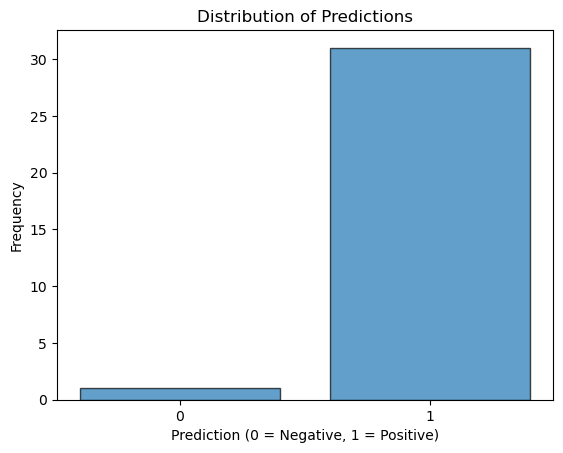


🔝 Топ-20 найпопулярніших слів у відгуках:
              word  count
1003            не    114
560           дуже     73
348            все     66
967             на     65
1644            та     60
213           було     60
1876            що     52
1475  розташування     43
1787            це     35
154            але     33
1835         чисто     31
519            для     29
1645           так     23
523             до     22
1055         номер     22
1444        ремонт     21
1793        центрі     21
715         зручне     20
645      заселення     19
422          вікна     18


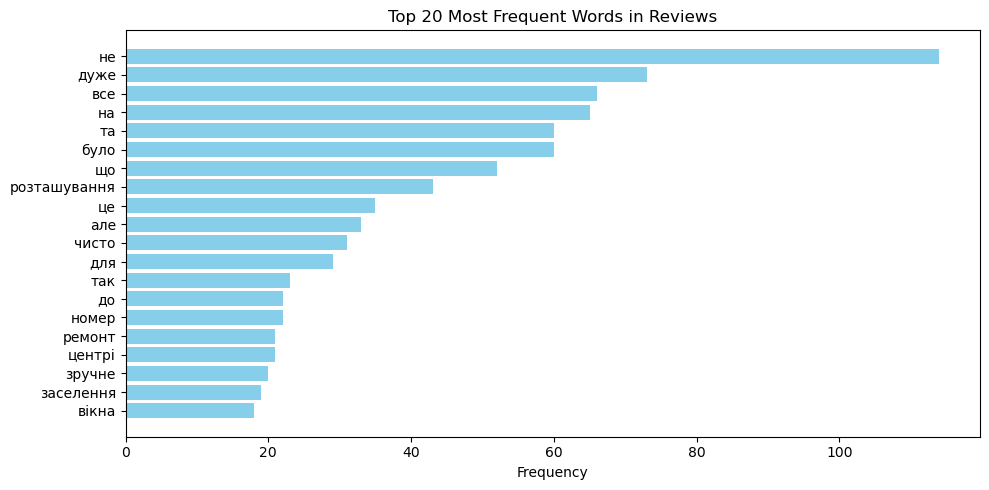

In [13]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'booking_reviews_5176606_2025-05-08.csv'
data = pd.read_csv(file_path)

# Очистка: видалення пропусків у ключових полях
data = data.dropna(subset=['Позитивні відгуки', 'Негативні відгуки', 'рахунок'])

# Об'єднання позитивних та негативних відгуків у єдине поле
data['text'] = data['Позитивні відгуки'] + " " + data['Негативні відгуки']

# Створення мітки: 1 — позитивний, 0 — негативний
data['label'] = data['рахунок'].apply(lambda x: 1 if x >= 8 else 0)

# Перетворення тексту в нижній регістр
data['cleaned_text'] = data['text'].apply(lambda x: x.lower())

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

# Векторизація тексту
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Навчання моделі
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Прогноз
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Розподіл прогнозів
print(data['label'].value_counts())

# Візуалізація
plt.hist(predictions, bins=np.arange(-0.5, 2), alpha=0.7, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Predictions')
plt.xlabel('Prediction (0 = Negative, 1 = Positive)')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

# 🔍 Аналіз найпопулярніших слів 
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Побудова DataFrame зі словами та їх частотою
word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})

# Вибір топ-20
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

print("\n🔝 Топ-20 найпопулярніших слів у відгуках:")
print(top_words)

# Візуалізація
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'][::-1], top_words['count'][::-1], color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

Accuracy: 0.91
1    128
0     32
Name: label, dtype: int64


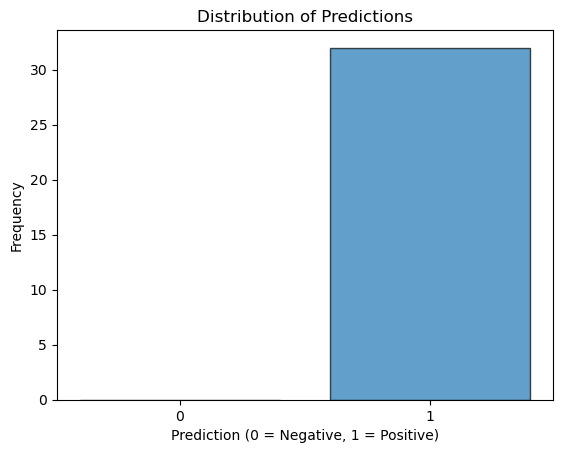


🔝 Топ-20 найпопулярніших слів у відгуках (без стоп-слів):
              word  count
1453  розташування     43
1802         чисто     31
1038         номер     22
1422        ремонт     21
1761        центрі     21
701         зручне     20
632      заселення     19
414          вікна     18
704         зручно     17
1007         немає     16
950          місце     15
126            the     14
1042        номері     14
1482        самому     13
750       квартира     12
875          ліжко     12
1804       чистота     11
408    відсутність     11
1138         очень     11
1226    помешкання     11


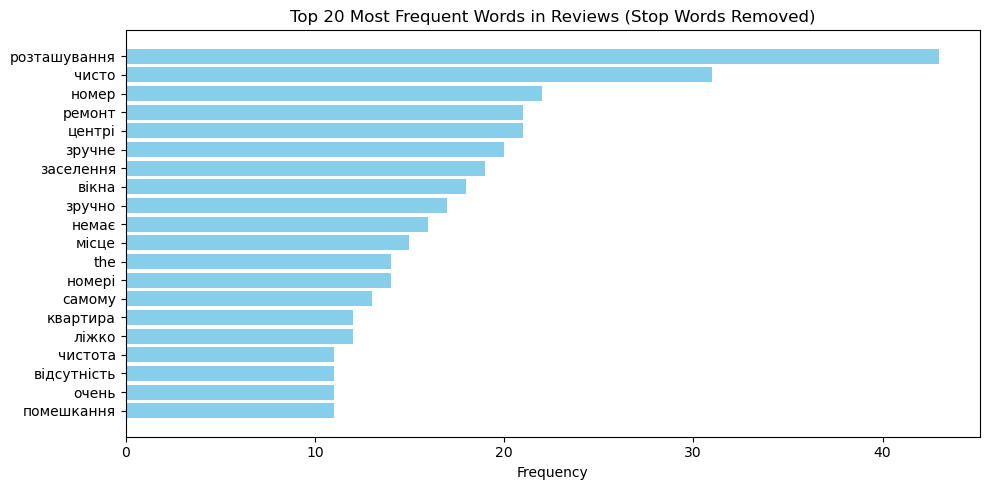

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'booking_reviews_5176606_2025-05-08.csv'
data = pd.read_csv(file_path)

# Очистка: видалення пропусків у ключових полях
data = data.dropna(subset=['Позитивні відгуки', 'Негативні відгуки', 'рахунок'])

# Об'єднання позитивних та негативних відгуків у єдине поле
data['text'] = data['Позитивні відгуки'] + " " + data['Негативні відгуки']

# Створення мітки: 1 — позитивний, 0 — негативний
data['label'] = data['рахунок'].apply(lambda x: 1 if x >= 8 else 0)

# Перетворення тексту в нижній регістр
data['cleaned_text'] = data['text'].apply(lambda x: x.lower())

# 📌 Список стоп-слів для української мови (сполучники, прислівники тощо)
ukrainian_stopwords = [
    'але', 'та', 'і', 'й', 'що', 'як', 'це', 'у', 'в', 'до', 'з', 'на', 'по', 
    'при', 'ще', 'вже', 'так', 'не', 'ну', 'теж', 'ж', 'а', 'чи', 'аби', 'хоч', 
    'бо', 'тільки', 'навіть', 'тому', 'щоб', 'будь', 'десь', 'зовсім', 'саме', 
    'ніби', 'ось', 'тоді', 'іноді', 'знову', 'інше', 'для', 'дуже', 'все', 'за', 'то', 'від', 'було', 'були', 'під'
]

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

# Векторизація тексту з фільтрацією стоп-слів
vectorizer = CountVectorizer(stop_words=ukrainian_stopwords)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Навчання моделі
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Прогноз
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Розподіл прогнозів
print(data['label'].value_counts())

# Візуалізація
plt.hist(predictions, bins=np.arange(-0.5, 2), alpha=0.7, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Predictions')
plt.xlabel('Prediction (0 = Negative, 1 = Positive)')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

# 🔍 Аналіз найпопулярніших слів 
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Побудова DataFrame зі словами та їх частотою
word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})

# Вибір топ-20
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

print("\n🔝 Топ-20 найпопулярніших слів у відгуках (без стоп-слів):")
print(top_words)

# Візуалізація
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'][::-1], top_words['count'][::-1], color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews (Stop Words Removed)')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()